In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Stressdataset1.csv")

In [4]:
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
data.isnull().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [7]:
data.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [8]:
data.shape

(630, 9)

<Axes: xlabel='hr', ylabel='sl'>

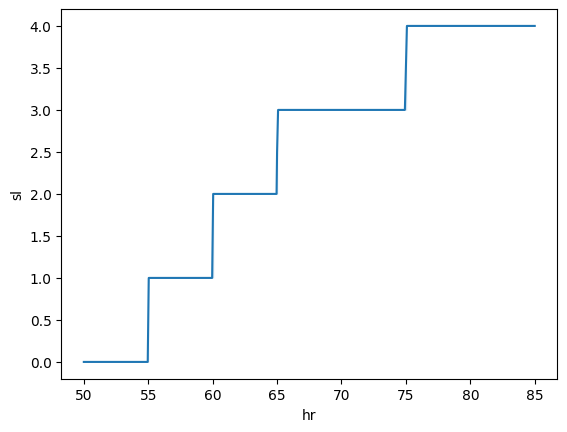

In [9]:
sns.lineplot(x = 'hr', y = 'sl', data= data)

In [10]:
data['sl'].value_counts()

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

<Axes: xlabel='sl', ylabel='count'>

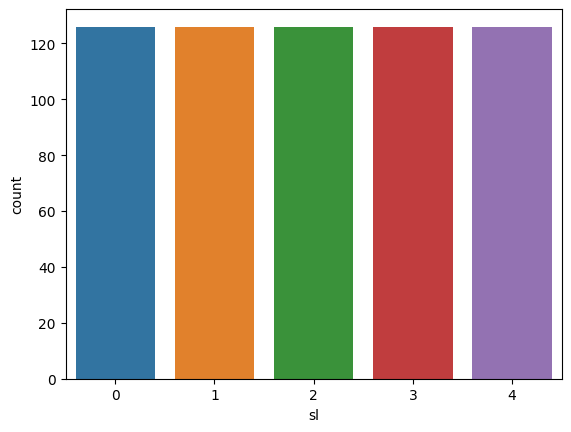

In [11]:
sns.countplot(x='sl', data=data)

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

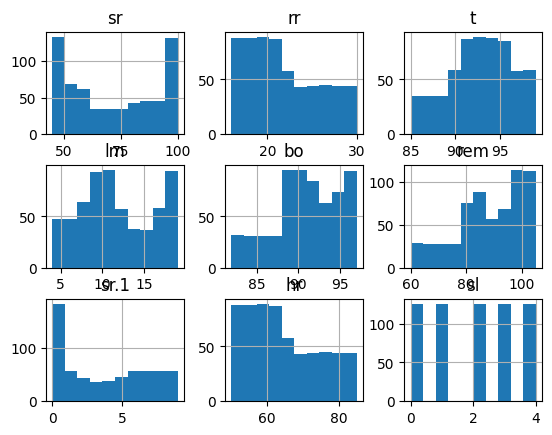

In [12]:
data.hist()

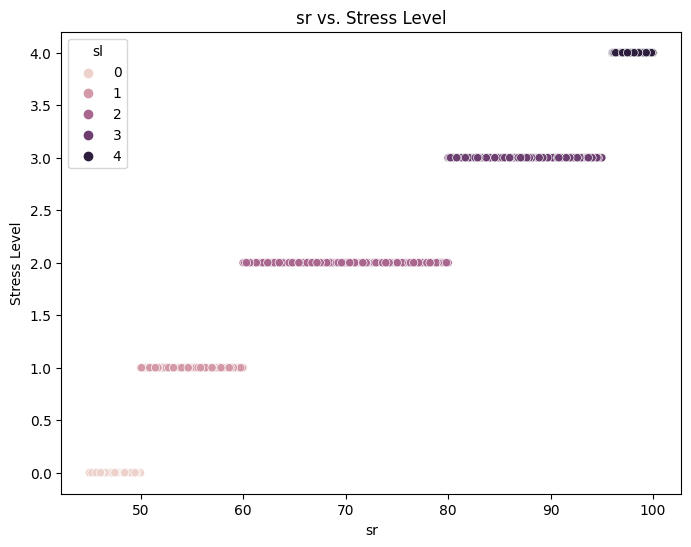

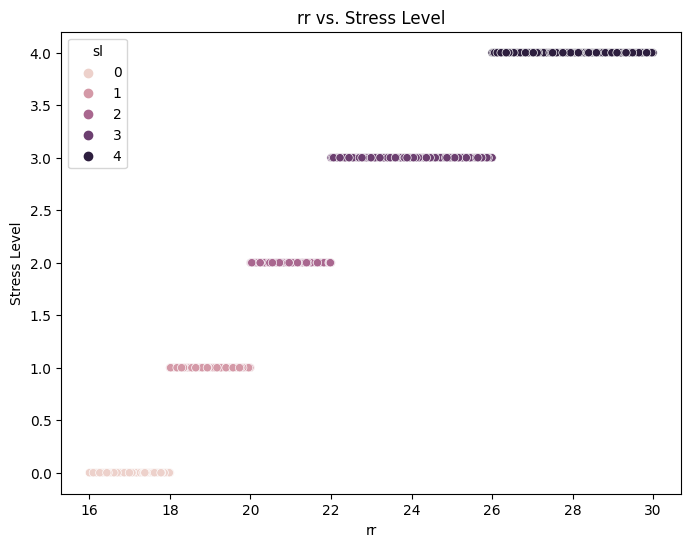

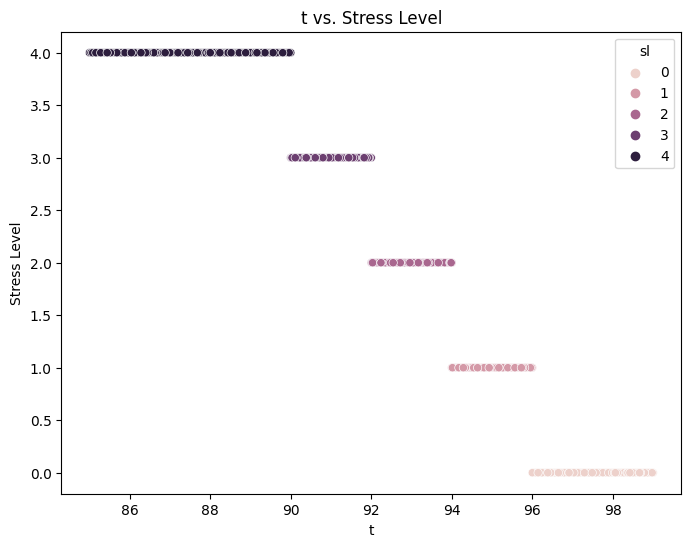

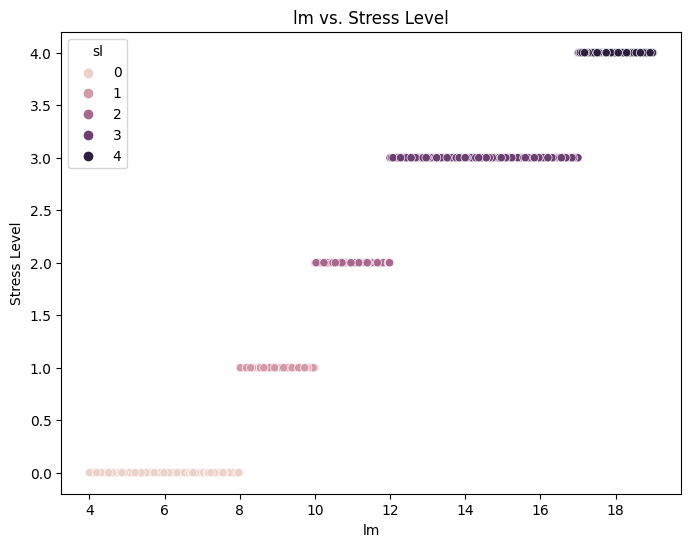

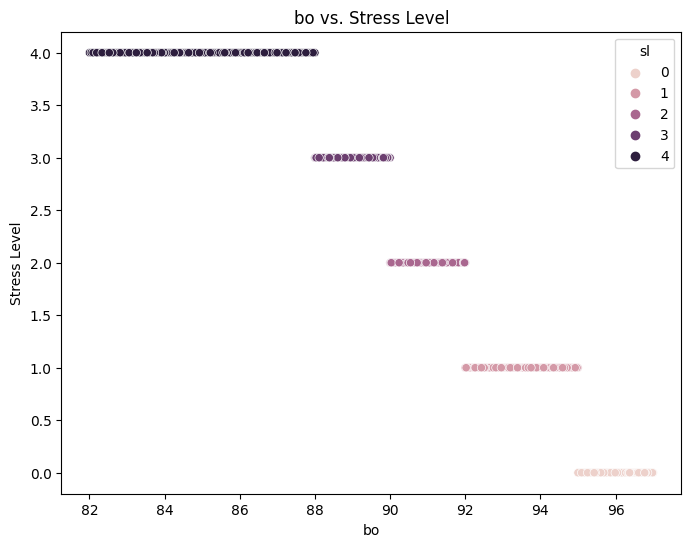

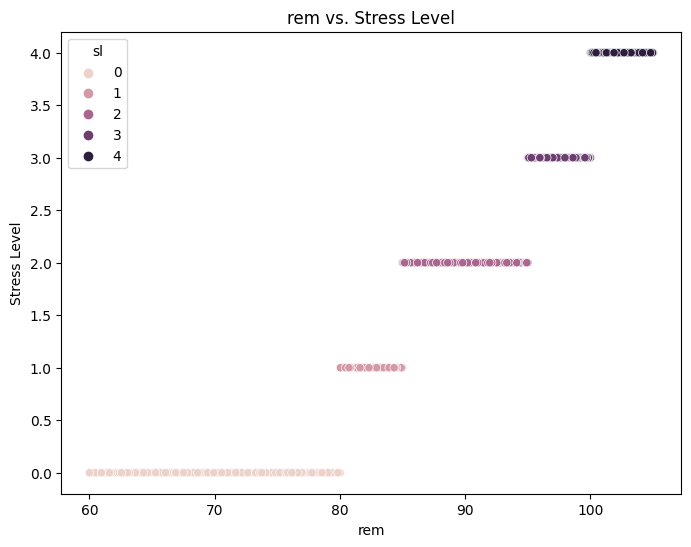

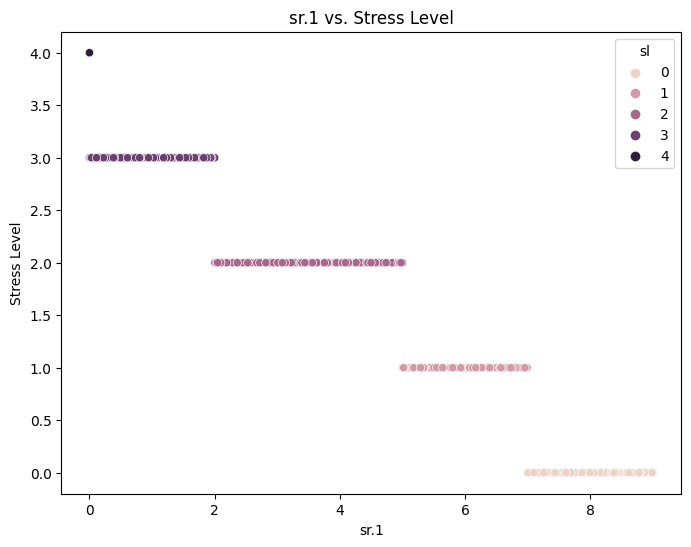

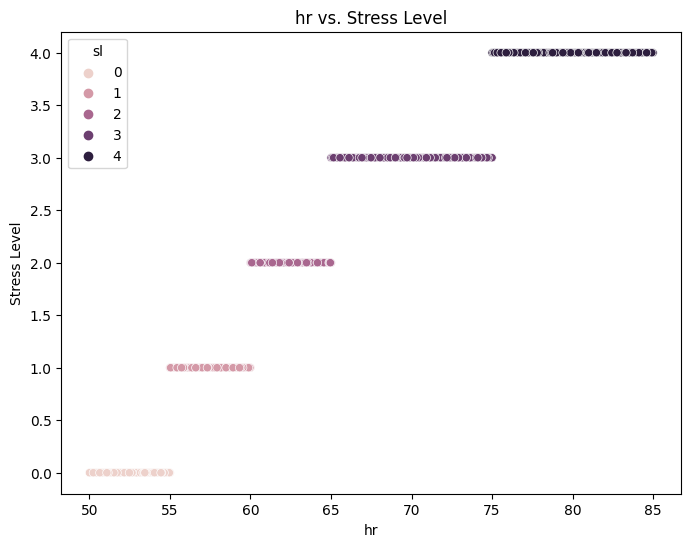

In [14]:
for feature in data.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y='sl', hue='sl')
    plt.title(f"{feature} vs. Stress Level")
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()


In [15]:

from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.linear_model import LogisticRegression    # For Logistic Regression model
from sklearn.ensemble import RandomForestClassifier    # For Random Forest model
from sklearn.tree import DecisionTreeClassifier        # For Decision Tree model
from sklearn.svm import SVC                            # For Support Vector Machine (SVM) model
from sklearn.naive_bayes import GaussianNB            # For Gaussian Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier


In [18]:
X = data.drop(['sl'], axis=1)
y = data['sl']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


In [21]:
log_reg = LogisticRegression(max_iter=1000, C=0.1)

In [22]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [23]:
log_reg.score(X_test, y_test)

1.0

In [24]:
y_predict = log_reg.predict(X_test)

In [25]:
matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [26]:
report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
decision_tree.score(X_test,y_test)

y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[23  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


In [28]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [29]:
decision_tree.score(X_test,y_test)

0.9841269841269841

In [30]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [31]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)





random_forest.score(X_test,y_test)


0.9920634920634921

In [32]:
y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


In [33]:
#3. Random Forest Classifier
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



In [34]:

#4. SVM Classifier


svm = SVC()
svm.fit(X_train,y_train)

svm.score(X_test,y_test)

y_predict = svm.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[22  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  1 27  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [35]:
#4. SVM Classifier
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      1.00      0.96        24
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



In [36]:

#6. Gaussian Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

naive_bayes.score(X_test,y_test)



y_predict = naive_bayes.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [37]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [47]:
#Stress Prediction

# Predicting Stress Levels
# To predict stress levels for new data, you can use the 'predict' method of the trained model.
# For example, let's assume we have new data in a DataFrame called 'new_data':
new_data = pd.DataFrame([[119.0, 902.0, 802.0, 905.0, 990.0, 909.0, 982.0, 987.0]], columns=X.columns)

# Predict the stress level for the new data
predicted_stress_level = log_reg.predict(new_data)


In [48]:
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}


In [49]:
# Assuming you already have the 'predicted_stress_level' from the previous code snippet
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

# Display the human-readable label for the predicted stress level
print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")


Predicted Stress Label for New Data: 1 ( Medium Low )
